## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse = pd.merge(mouse_metadata, study_results)
mouse_df = pd.DataFrame(mouse)
# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_number = len(mouse_df["Mouse ID"].value_counts())
mice_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_df.loc[mouse_df.duplicated(['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_df['Mouse ID']=="g989"
d_mouse = mouse_df[duplicate_mouse]
d_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df.drop(mouse_df[mouse_df['Mouse ID']=="g989"].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
new_mice_number = len(clean_df["Mouse ID"].value_counts())
new_mice_number


248

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Nodupes_df = dupes_df[dupes_df["Mouse ID"]==[] != 0]
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorbydrug_df = clean_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_df = tumorbydrug_df.groupby(["Drug Regimen"])

mean = tumor_df["Tumor Volume (mm3)"].mean()
median = tumor_df["Tumor Volume (mm3)"].median()
var = tumor_df["Tumor Volume (mm3)"].var()
std = tumor_df["Tumor Volume (mm3)"].std()
sem = tumor_df["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({"Tumor Volume Mean": mean,
                             "Tumor Volume Median": median,
                             "Tumor Volume Variance": var,
                             "Tumor Volume Std. Dev.": std,
                             "Tumor Volume Std. Err.": sem})
tumor_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorbydrug_df = clean_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_df = tumorbydrug_df.groupby(["Drug Regimen"])

mean = tumor_df["Tumor Volume (mm3)"].mean()
median = tumor_df["Tumor Volume (mm3)"].median()
var = tumor_df["Tumor Volume (mm3)"].var()
std = tumor_df["Tumor Volume (mm3)"].std()
sem = tumor_df["Tumor Volume (mm3)"].sem()

Ztumor_summary = pd.DataFrame({"Tumor Volume Mean": mean,
                             "Tumor Volume Median": median,
                             "Tumor Volume Variance": var,
                             "Tumor Volume Std. Dev.": std,
                             "Tumor Volume Std. Err.": sem})
Ztumor_summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorbydrug_df = clean_df.loc[:, ["Drug Regimen", "Tumor Volume (mm3)"]]
Ztumor_summary2 = pd.DataFrame(tumorbydrug_df.groupby(tumorbydrug_df["Drug Regimen"]).agg(["mean", 
                                                                                         "median", 
                                                                                         "var", 
                                                                                         "std", 
                                                                                         "sem"]))
Ztumor_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

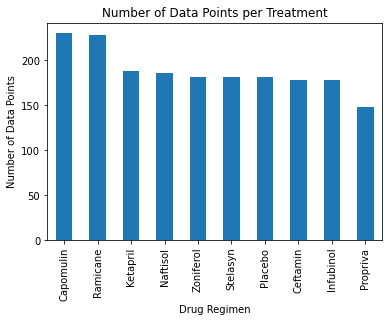

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_df = clean_df.loc[:, ["Mouse ID", "Drug Regimen"]]
treatment_df = treatment_df["Drug Regimen"].value_counts()
treatment_df.plot(kind = 'bar')
plt.title("Number of Data Points per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

<BarContainer object of 10 artists>

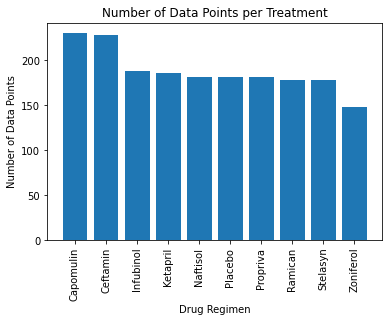

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create x and y axis values
regimen_count = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen_count))

# Create Bar Chart with labels
pyplot_bar = plt.bar(x_axis , regimen_count)
plt.title("Number of Data Points per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

tick_locs = [value for value in x_axis]
plt.xticks(tick_locs, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol','Placebo', 
                      'Propriva', 'Ramican', 'Stelasyn', 'Zoniferol'], rotation = 'vertical')
pyplot_bar

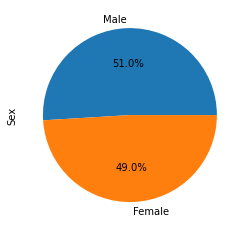

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = clean_df["Sex"].value_counts()
sex_df.plot(kind = "pie", autopct = '%1.1f%%')

Text(0, 0.5, 'Sex')

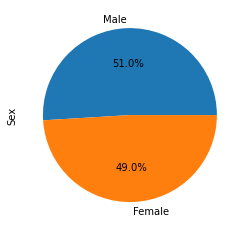

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(sex_df, labels = labels, autopct = '%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_df = No_dupes_df["Drug Regimen"].isin(treatments)
tumor_df = No_dupes_df[regimen_df]
tumor_df

# Start by getting the last (greatest) timepoint for each mouse
last_tp = tumor_df.drop_duplicates(subset = 'Mouse ID', keep = 'last')
last_tp
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


NameError: name 'No_dupes_df' is not defined

In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_df = No_dupes_df["Drug Regimen"].isin(treatment_list)
tumor_vol_df = No_dupes_df[regimen_df]
tumor_vol_df

# Start by getting the last (greatest) timepoint for each mouse
last_tp = tumor_vol_df.drop_duplicates(subset = 'Mouse ID', keep = 'last')
last_tp
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = last_tp.loc[last_tp["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25, .5, .75])
    low_q = quartiles[0.25]
    up_q = quartiles[0.75]
    iqr = up_q - low_q
    low_bound = low_q - (1.5 * iqr)
    up_bound = up_q + (1.5 * iqr)
    outliers = final_tumor.loc[(final_tumor < low_bound) | (final_tumor > up_bound)]
    print(f"\n{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

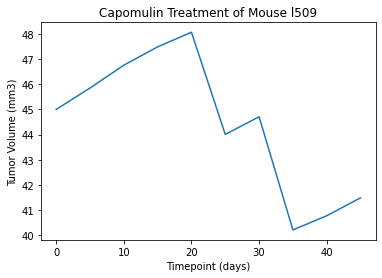

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = clean_df[clean_df['Drug Regimen']=='Capomulin']

# Group by mean
cap_mouse = Capomulin.groupby(['Mouse ID']).mean()
cap_mouse

# Select a mouse
mouse = clean_df[clean_df['Mouse ID']=='l509']
mouse

# Set X and Y values for plot
mouse_x = mouse['Timepoint']
mouse_y = mouse['Tumor Volume (mm3)']

# Plot X and Y values
plt.plot(mouse_x, mouse_y)

# Add title and add labels to X and Y axes
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

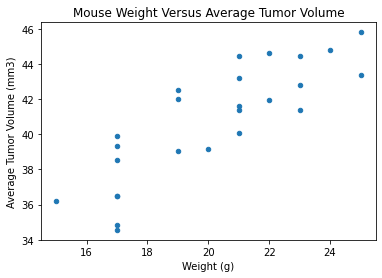

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Scatter plot of Capomulin Mice
cap_mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

# Add labels to X and Y axes :: Add title
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [35]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation Coefficient
weight = cap_mouse.loc[:,'Weight (g)']
tumor = cap_mouse.loc[:,'Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
correlation
print(f"The correlation between weight and the average tumor volume is {round(correlation[0],2)}.")

The correlation between weight and the average tumor volume is 0.84.


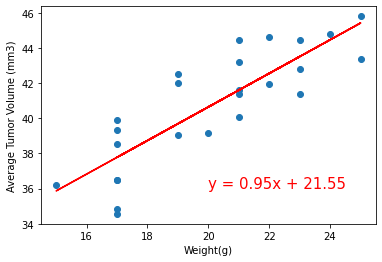

In [37]:
# Plot the correlation
# define x and y values
x_values = weight
y_values = tumor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Define the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

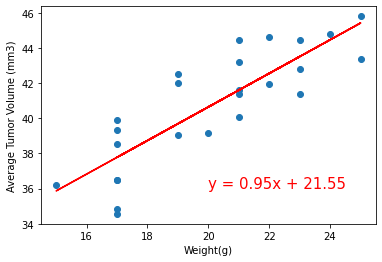

In [38]:
# Plot the correlation
# define x and y values
x_values = weight
y_values = tumor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Define the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()